## Деревья

`pip install binarytree anytree pandas graphviz`

## Бинарные деревья

Сколько точно вершин и листьев в идеальном бинарном дереве?

1. $h = 1$ → $N = 1$, $L = 1$
2. $h = 2$ → $N = 3$, $L = 2$
3. $h = 3$ → $N = 7$, $L = 4$
4. ...

По индукции:

* в дереве высоты $h$ вершин $N = 2^h - 1$ и листьев из них $L = 2^{h-1}$
* для $h + 1$ листьев очевидно будет $L = 2^h$, а вершин — $N = 2^h - 1 + L = 2^h - 1 + 2^h = 2^{h+1} - 1$

In [14]:
import math
import binarytree
import pandas
import random
from typing import List, Tuple

data: List[Tuple[int, int]] = []
r = random.Random()

for c in range(1000):
    height = r.randint(5, 9)
    t = binarytree.bst(height=height)  # мы не разбирались, как она генерирует случайные деревья
    data.append((len(t), height + 1)) # но высотой считает не количество уровней, а максимальную длину пути от корня

df = pandas.DataFrame(data, columns=["N", "h"])
df

,N,h
0,60,7
1,215,9
2,25,7
3,183,9
4,56,7
...,...,...
995,99,8
996,346,10
997,384,10
998,55,7


In [15]:
import numpy as np

@np.vectorize
def ideal_height(n: int) -> float:
    return math.log2(n + 1)

df['h_ideal'] = ideal_height(df['N'])
df['overhead'] = df['h'] / df['h_ideal']

count    1000.000000
mean        1.215605
std         0.069559
min         1.098086
25%         1.172990
50%         1.200000
75%         1.238617
max         1.806180
Name: overhead, dtype: float64

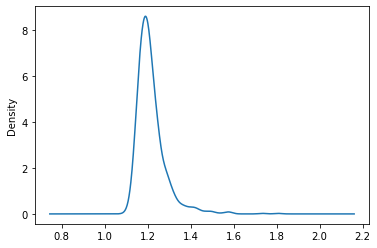

In [16]:
%matplotlib inline

df['overhead'].plot.kde()
df['overhead'].describe()

## Немножко про рисование графов

https://www.graphviz.org/

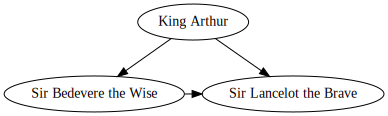

In [6]:
from graphviz import files

f = files.Source(source='''digraph {
    A [label="King Arthur"]
    B [label="Sir Bedevere the Wise"]
    L [label="Sir Lancelot the Brave"]
    A -> B
    A -> L
    B -> L [constraint=false]
    }''')

f

## Деревья вообще



In [17]:
from anytree import Node, RenderTree
from anytree.render import AsciiStyle, ContRoundStyle

root = Node("root")
s0 = Node("sub0", parent=root)
s0b = Node("sub0B", parent=s0)
s0a = Node("sub0A", parent=s0)
s1 = Node("sub1", parent=root)

print(RenderTree(root, style=AsciiStyle()))
print(RenderTree(root, style=ContRoundStyle()))

Node('/root')
|-- Node('/root/sub0')
|   |-- Node('/root/sub0/sub0B')
|   +-- Node('/root/sub0/sub0A')
+-- Node('/root/sub1')
Node('/root')
├── Node('/root/sub0')
│   ├── Node('/root/sub0/sub0B')
│   ╰── Node('/root/sub0/sub0A')
╰── Node('/root/sub1')


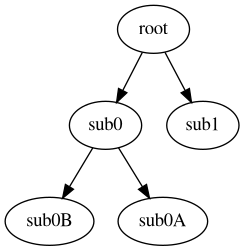

In [21]:
from IPython.display import Image
from anytree.dotexport import RenderTreeGraph
import tempfile
import os
tn = tempfile.mktemp('.png')

RenderTreeGraph(root).to_picture(tn)
i = Image(filename=tn)
os.remove(tn)
i